In [2]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import tree
from sklearn.model_selection import learning_curve
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import statistics
import matplotlib.pyplot as plt
import joblib


#to save models
from sklearn.linear_model import LogisticRegression
import pickle
def plot_learning_curve(model,xtr,ytr):
    train_sizes, train_scores, test_scores = learning_curve(model, xtr, ytr, cv=5, scoring='accuracy', n_jobs=-1, 
                                                        train_sizes=np.linspace(0.01, 1.0, 98))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_mean,"r--",label="train")
    plt.plot(test_mean,"b-",label="val")
    plt.title("Learning curve")
    plt.xlabel("Trainin set size")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
    
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--') # dashed diagonal
    plt.show()
colnames = ['class', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'id']
monk1_tr = pd.read_csv("./data/monks-1.train", sep = " ", skipinitialspace=True, names = colnames)
monk1_tr = monk1_tr.drop('id', axis = 1)

monk1_ts = pd.read_csv("./data/monks-1.test", sep = " ", skipinitialspace=True, names = colnames)
monk1_ts = monk1_ts.drop('id', axis = 1)
x_monk1_tr = monk1_tr.iloc[:, 1:7].values
y_monk1_tr = monk1_tr.iloc[:, 0].values

x_monk1_ts = monk1_ts.iloc[:, 1:7].values
y_monk1_ts = monk1_ts.iloc[:, 0].values
one_hot_encoder_tr = OneHotEncoder(sparse=False)
one_hot_encoder_tr.fit(x_monk1_tr)
x_monk1_tr = one_hot_encoder_tr.transform(x_monk1_tr)

one_hot_encoder_ts = OneHotEncoder(sparse=False)
one_hot_encoder_ts.fit(x_monk1_ts)
x_monk1_ts = one_hot_encoder_ts.transform(x_monk1_ts)

x_monk1_tr, y_monk1_tr = shuffle(x_monk1_tr, y_monk1_tr)
x_monk1_ts, y_monk1_ts = shuffle(x_monk1_ts, y_monk1_ts)

In [9]:
# RandomForest gridsearch
'''
 'min_weight_fraction_leaf': [0.0, 0.1, 0.05, 0.01, 0.005, 0.001],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
'''
param_grid = {
    'n_estimators': np.arange(30, 150, 5),
    'ccp_alpha': [0.0, 0.1, 0.05, 0.01, 0.005, 0.001,0.0001,0.0005,0.2,0.02,0.0002],
    'criterion': ["gini","entropy","log_loss"]
}

rf = RandomForestClassifier()

grid = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=False,
    verbose=4
)

grid.fit(x_monk1_tr, y_monk1_tr)








Fitting 5 folds for each of 792 candidates, totalling 3960 fits
[CV 1/5] END ccp_alpha=0.0, criterion=gini, n_estimators=30;, score=0.920 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0, criterion=gini, n_estimators=30;, score=0.800 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0, criterion=gini, n_estimators=30;, score=0.920 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0, criterion=gini, n_estimators=30;, score=0.880 total time=   0.0s
[CV 5/5] END ccp_alpha=0.0, criterion=gini, n_estimators=30;, score=0.958 total time=   0.0s
[CV 1/5] END ccp_alpha=0.0, criterion=gini, n_estimators=35;, score=0.920 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0, criterion=gini, n_estimators=35;, score=0.840 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0, criterion=gini, n_estimators=35;, score=0.920 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0, criterion=gini, n_estimators=35;, score=0.960 total time=   0.0s
[CV 5/5] END ccp_alpha=0.0, criterion=gini, n_estimators=35;, score=0.958 total time=   0.0s
[CV 1/

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.1, 0.05, 0.01, 0.005, 0.001,
                                       0.0001, 0.0005, 0.2, 0.02, 0.0002],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': array([ 30,  35,  40,  45,  50,  55,  60,  65,  70,  75,  80,  85,  90,
        95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145])},
             scoring='accuracy', verbose=4)

In [10]:
print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'ccp_alpha': 0.0005, 'criterion': 'entropy', 'n_estimators': 65} with a score of 0.93600


In [11]:
rf = grid.best_estimator_
rf

RandomForestClassifier(ccp_alpha=0.0005, criterion='entropy', n_estimators=65)

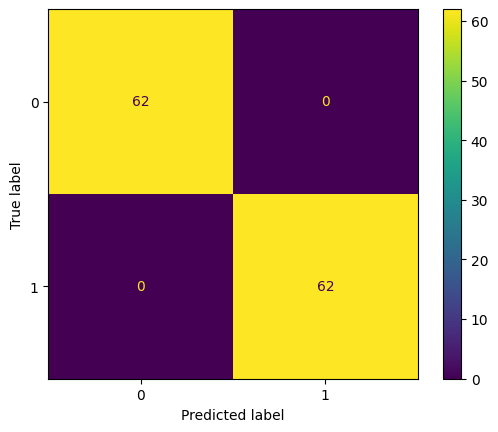

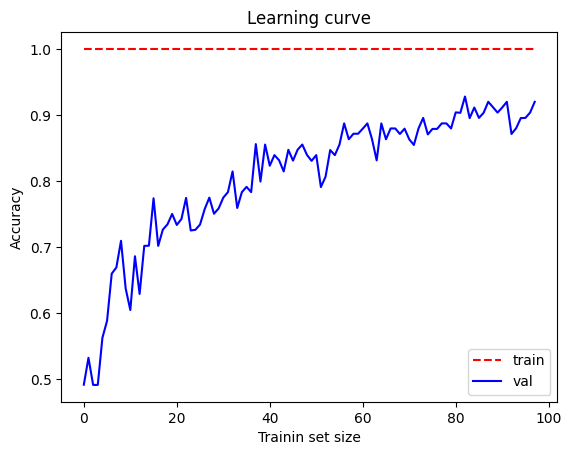

Final accuracy on the training set: 1.0


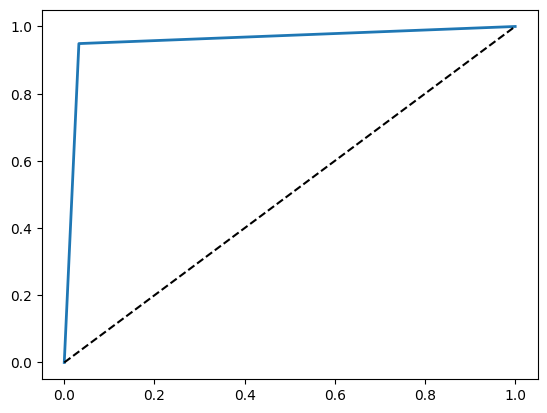

In [12]:
predictions = rf.predict(x_monk1_tr)
cm = confusion_matrix(y_monk1_tr, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
plot_learning_curve(rf,x_monk1_tr,y_monk1_tr)
score = rf.score(x_monk1_tr, y_monk1_tr)
print("Final accuracy on the training set: " + str(score))
predictions = rf.predict(x_monk1_ts)
fpr, tpr, thresholds = roc_curve(y_monk1_ts,predictions)
plot_roc_curve(fpr,tpr)

## Accuracy on Test

In [14]:
print("Final accuracy on the test set: " + str(rf.score(x_monk1_ts, y_monk1_ts)))

Final accuracy on the test set: 0.9583333333333334


In [13]:
#joblib.dump(rf, 'savedModels/rf_Monks1.z')

['savedModels/rf_Monks1.z']

## Monk2

In [22]:
colnames = ['class', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'id']
monk2_tr = pd.read_csv("./data/monks-2.train", sep = " ", skipinitialspace=True, names = colnames)
monk2_tr = monk2_tr.drop('id', axis = 1)

monk2_ts = pd.read_csv("./data/monks-2.test", sep = " ", skipinitialspace=True, names = colnames)
monk2_ts = monk2_ts.drop('id', axis = 1)
x_monk2_tr = monk2_tr.iloc[:, 1:7].values
y_monk2_tr = monk2_tr.iloc[:, 0].values

x_monk2_ts = monk2_ts.iloc[:, 1:7].values
y_monk2_ts = monk2_ts.iloc[:, 0].values
one_hot_encoder_tr = OneHotEncoder(sparse=False)
one_hot_encoder_tr.fit(x_monk2_tr)
x_monk2_tr = one_hot_encoder_tr.transform(x_monk2_tr)

one_hot_encoder_ts = OneHotEncoder(sparse=False)
one_hot_encoder_ts.fit(x_monk2_ts)
x_monk2_ts = one_hot_encoder_ts.transform(x_monk2_ts)

In [23]:
# RandomForest gridsearch

param_grid = {
    'n_estimators': np.arange(30, 150, 5),
    'ccp_alpha': np.arange(0.0001,0.0009),
    'criterion': ["gini","entropy","log_loss"]
}

rf = RandomForestClassifier()

grid = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=False,
    verbose=4
)

grid.fit(x_monk2_tr, y_monk2_tr)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END ccp_alpha=0.0001, criterion=gini, n_estimators=30;, score=0.559 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0001, criterion=gini, n_estimators=30;, score=0.500 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0001, criterion=gini, n_estimators=30;, score=0.500 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0001, criterion=gini, n_estimators=30;, score=0.500 total time=   0.0s
[CV 5/5] END ccp_alpha=0.0001, criterion=gini, n_estimators=30;, score=0.667 total time=   0.0s
[CV 1/5] END ccp_alpha=0.0001, criterion=gini, n_estimators=35;, score=0.559 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0001, criterion=gini, n_estimators=35;, score=0.500 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0001, criterion=gini, n_estimators=35;, score=0.500 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0001, criterion=gini, n_estimators=35;, score=0.529 total time=   0.0s
[CV 5/5] END ccp_alpha=0.0001, criterion=gini, n_estimators=35;, score=0.6

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': array([0.0001]),
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': array([ 30,  35,  40,  45,  50,  55,  60,  65,  70,  75,  80,  85,  90,
        95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145])},
             scoring='accuracy', verbose=4)

In [24]:
print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'ccp_alpha': 0.0001, 'criterion': 'gini', 'n_estimators': 85} with a score of 0.59251


In [25]:
rf = grid.best_estimator_
rf

RandomForestClassifier(ccp_alpha=0.0001, n_estimators=85)

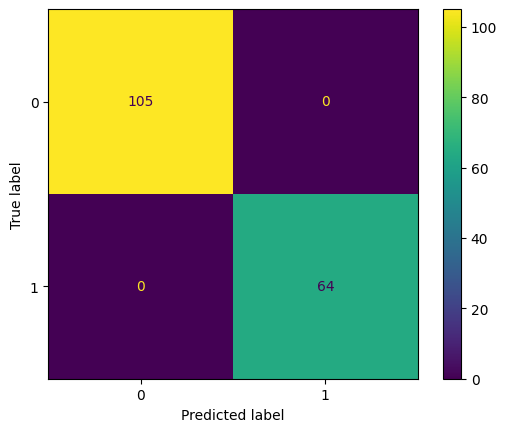

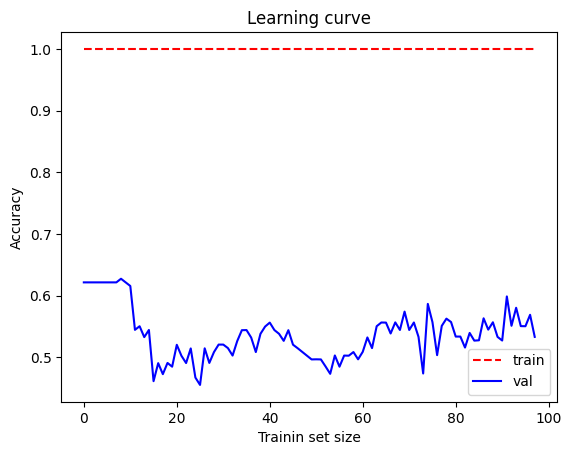

Final accuracy on the training set: 1.0


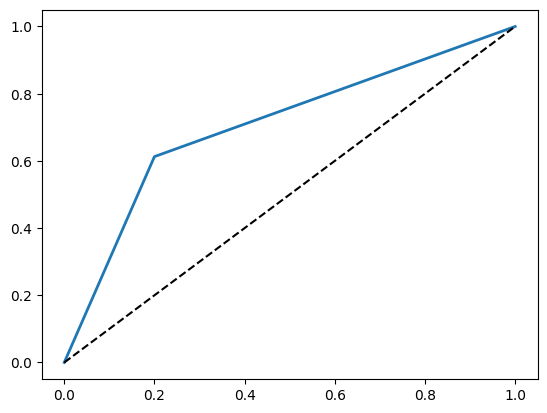

In [26]:
predictions = rf.predict(x_monk2_tr)
cm = confusion_matrix(y_monk2_tr, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
plot_learning_curve(rf,x_monk2_tr,y_monk2_tr)
score = rf.score(x_monk2_tr, y_monk2_tr)
print("Final accuracy on the training set: " + str(score))
predictions = rf.predict(x_monk2_ts)
fpr, tpr, thresholds = roc_curve(y_monk2_ts,predictions)
plot_roc_curve(fpr,tpr)


In [27]:
## Accuracy on Test
print("Final accuracy on the test set: " + str(rf.score(x_monk2_ts, y_monk2_ts)))


Final accuracy on the test set: 0.7384259259259259


In [28]:
joblib.dump(rf, 'savedModels/rf_Monks2.z')

['savedModels/rf_Monks2.z']

## Monk3

In [29]:
colnames = ['class', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'id']
monk3_tr = pd.read_csv("./data/monks-3.train", sep = " ", skipinitialspace=True, names = colnames)
monk3_tr = monk3_tr.drop('id', axis = 1)

monk3_ts = pd.read_csv("./data/monks-3.test", sep = " ", skipinitialspace=True, names = colnames)
monk3_ts = monk3_ts.drop('id', axis = 1)
x_monk3_tr = monk3_tr.iloc[:, 1:7].values
y_monk3_tr = monk3_tr.iloc[:, 0].values

x_monk3_ts = monk3_ts.iloc[:, 1:7].values
y_monk3_ts = monk3_ts.iloc[:, 0].values
one_hot_encoder_tr = OneHotEncoder(sparse=False)
one_hot_encoder_tr.fit(x_monk3_tr)
x_monk3_tr = one_hot_encoder_tr.transform(x_monk3_tr)

one_hot_encoder_ts = OneHotEncoder(sparse=False)
one_hot_encoder_ts.fit(x_monk3_ts)
x_monk3_ts = one_hot_encoder_ts.transform(x_monk3_ts)


In [30]:
# RandomForest gridsearch

param_grid = {
    'n_estimators': np.arange(30, 150, 5),
    'ccp_alpha': np.arange(0.0001,0.0009),
    'criterion': ["gini","entropy","log_loss"]
}

rf = RandomForestClassifier()

grid = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=False,
    verbose=4
)

grid.fit(x_monk3_tr, y_monk3_tr)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END ccp_alpha=0.0001, criterion=gini, n_estimators=30;, score=0.920 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0001, criterion=gini, n_estimators=30;, score=0.880 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0001, criterion=gini, n_estimators=30;, score=0.875 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0001, criterion=gini, n_estimators=30;, score=0.833 total time=   0.0s
[CV 5/5] END ccp_alpha=0.0001, criterion=gini, n_estimators=30;, score=0.833 total time=   0.0s
[CV 1/5] END ccp_alpha=0.0001, criterion=gini, n_estimators=35;, score=0.920 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0001, criterion=gini, n_estimators=35;, score=0.920 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0001, criterion=gini, n_estimators=35;, score=0.875 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0001, criterion=gini, n_estimators=35;, score=0.875 total time=   0.0s
[CV 5/5] END ccp_alpha=0.0001, criterion=gini, n_estimators=35;, score=0.8

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': array([0.0001]),
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': array([ 30,  35,  40,  45,  50,  55,  60,  65,  70,  75,  80,  85,  90,
        95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145])},
             scoring='accuracy', verbose=4)

In [31]:
print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'ccp_alpha': 0.0001, 'criterion': 'log_loss', 'n_estimators': 120} with a score of 0.92567


In [32]:
rf = grid.best_estimator_
rf

RandomForestClassifier(ccp_alpha=0.0001, criterion='log_loss', n_estimators=120)

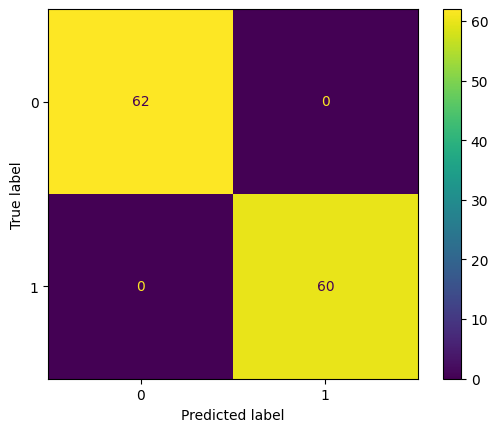

/Users/dylan/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:1651: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 97 instead of 98.
  warnings.warn(


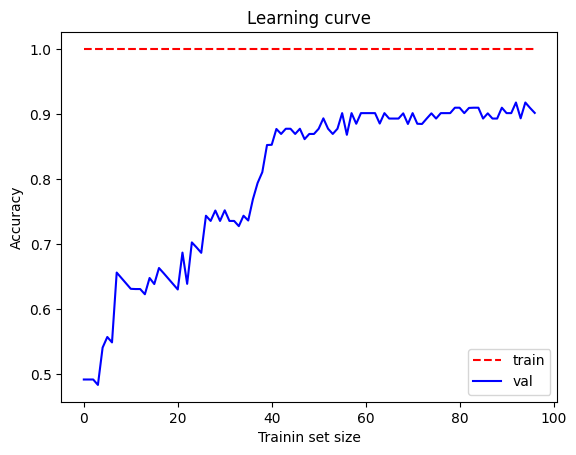

Final accuracy on the training set: 1.0


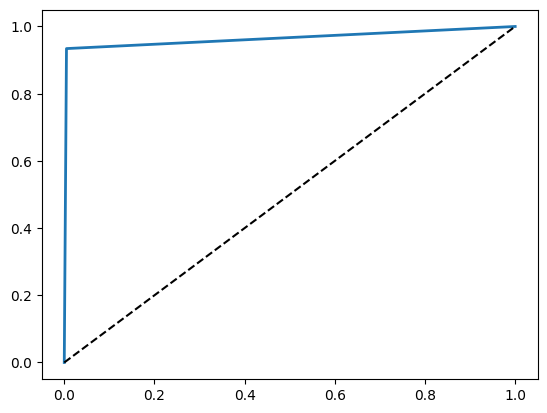

In [33]:
predictions = rf.predict(x_monk3_tr)
cm = confusion_matrix(y_monk3_tr, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
plot_learning_curve(rf,x_monk3_tr,y_monk3_tr)
score = rf.score(x_monk3_tr, y_monk3_tr)
print("Final accuracy on the training set: " + str(score))
predictions = rf.predict(x_monk3_ts)
fpr, tpr, thresholds = roc_curve(y_monk3_ts,predictions)
plot_roc_curve(fpr,tpr)


In [34]:
## Accuracy on Test
print("Final accuracy on the test set: " + str(rf.score(x_monk3_ts, y_monk3_ts)))


Final accuracy on the test set: 0.9629629629629629


In [35]:
joblib.dump(rf, 'savedModels/rf_Monks3.z')

['savedModels/rf_Monks3.z']